In [1]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':900,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':1200
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'D',
    'freq_output':'A',
    'rate_limit': 300,
    'iter':10,
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-2000,
            'periods':1,
            'target':'capex'
        }
    ]
}

p2_dict = {
    'name':'pud',
    'dca': {
        #'ti':['2022-01-01','2022-05-01'],
        'ti':'2022-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':3000,
        'b':0,
        'fluid_rate':5600
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'D',
    'freq_output':'A',
    'depends':{'period':'pdp'},
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-6000,
            'periods':1,
            'target':'capex'
        }
    ]
}

p1 = Period(**p1_dict)
p2 = Period(**p2_dict)



In [3]:
d1 = dca.Arps(**{
        'ti':['2022-01-01','2022-05-01'],
        'di':[0.3,0.4],
        'freq_di':'A',
        'qi':1500,
        'b':0,
        'fluid_rate':1600
    })
d1.forecast(start=date(2022,1,1), end=date(2025,1,1)).head()

UnboundLocalError: local variable 'ti_array' referenced before assignment

In [4]:
qi = [400,500]
di = 0.3
b = 0
ti = [date(2021,2,1), date(2021,4,1)]
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
           oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                     
2021-02  400.000000      0.000000          0  11072.106269      1000.0   
2021-03  390.899639  11072.106269          0  11518.459668      1200.0   
2021-04  381.065546  23036.919336          0  11628.494355      1300.0   
2021-05  371.784305  34329.094979          0  11335.949459      1200.0   
2021-06  362.431108  45708.818254          0  11059.850841      1300.0   
2021-07  353.603729  56448.79

In [5]:
s1 = Scenario(name='base', periods=[p1,p2])
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 900, 'scale': 200} bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='D', freq_output='A', rate_limit=300.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='capex', const_value=-2000.0, periods=1, array_values=None, target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None), Period(name='pud', dca=Declination 
 Ti: 2022-01-01 
 Qi: 3000.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='D', freq_output='A', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=[CashFlowParams(name='capex', const_value=-6000.0, periods=1, array_values=None, target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=Depends(period='pdp', dela

In [6]:
fore1 = s1.generate_forecast()


/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:239: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:115: RuntimeWarning: invalid value encountered in log
  return (qi/di)*np.log((di*time_array + 1)/(di*ti+1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

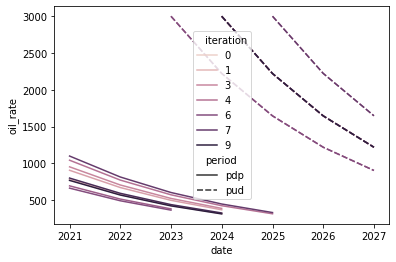

In [7]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration',style='period')

In [8]:
#sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate')

In [9]:
c1 = s1.generate_cashflow()
c1[0]

CashFlowModel(name='base', income=None, opex=None, capex=[CashFlow(name='capex', const_value=-2000.0, start=datetime.date(2021, 12, 31), end=datetime.date(2024, 12, 31), periods=1, freq_output='A', freq_input='D', chgpts=None), CashFlow(name='capex', const_value=-6000.0, start=datetime.date(2024, 12, 31), end=datetime.date(2027, 12, 31), periods=1, freq_output='A', freq_input='D', chgpts=None)])

In [10]:
c1[0].fcf()

,capex,capex,total_capex,total_income,total_opex,fcf,cum_fcf
2021,-2000.0,0.0,-2000.0,0,0,-2000.0,-2000.0
2024,0.0,-6000.0,-6000.0,0,0,-6000.0,-8000.0


In [11]:
fore1['iteration'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
s1.periods[0].get_end_dates()

[datetime.date(2024, 1, 1),
 datetime.date(2024, 1, 1),
 datetime.date(2024, 1, 1),
 datetime.date(2024, 1, 1),
 datetime.date(2025, 1, 1),
 datetime.date(2023, 1, 1),
 datetime.date(2023, 1, 1),
 datetime.date(2025, 1, 1),
 datetime.date(2024, 1, 1),
 datetime.date(2024, 1, 1)]

In [13]:
p3_dict = {
    'name':'pud',
    'dca': {
        #'ti':['2022-01-01','2022-05-01'],
        'ti':['2025-01-01','2023-01-01'],
        'di':0.3,
        'freq_di':'A',
        'qi':3000,
        'b':0,
        'fluid_rate':5600
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'D',
    'freq_output':'A',
    'depends':{'period':'pdp'},
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-6000,
            'periods':1,
            'target':'capex'
        }
    ]
}
p4_dict = {
    'name':'pud',
    'dca': {
        #'ti':['2022-01-01','2022-05-01'],
        'ti':['2023-01-01','2025-01-01'],
        'di':0.3,
        'freq_di':'A',
        'qi':3000,
        'b':0,
        'fluid_rate':5600
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'D',
    'freq_output':'A',
    'depends':{'period':'pdp'},
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-6000,
            'periods':1,
            'target':'capex'
        }
    ]
}
p3 = Period(**p3_dict)
p4 = Period(**p4_dict)

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:115: RuntimeWarning: invalid value encountered in log
  return (qi/di)*np.log((di*time_array + 1)/(di*ti+1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:115: RuntimeWarning: invalid value encountered in log
  return (qi/di)*np.log((di*time_array + 1)/(di*ti+1))
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide 

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

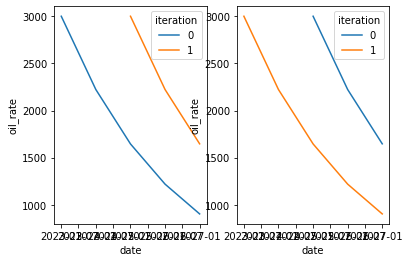

In [14]:
p3f = p3.generate_forecast()
p4f = p4.generate_forecast()
fig, ax = plt.subplots(1,2)
sns.lineplot(data=p4f,x=p4f.index.to_timestamp(),y='oil_rate', hue='iteration',ax=ax[0])
sns.lineplot(data=p3f,x=p3f.index.to_timestamp(),y='oil_rate', hue='iteration',ax=ax[1])